<a href="https://colab.research.google.com/github/Guillem-123/Heart_disease_detector/blob/main/Heart_disease_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -r requirements.txt

###**1. Download the dataset from kaggle**###

In [ ]:
!curl -L -o /content/heart-disease-dataset.zip\
  https://www.kaggle.com/api/v1/datasets/download/johnsmith88/heart-disease-dataset

In [ ]:
!unzip -o /content/heart-disease-dataset.zip -d /content/heart-disease-dataset

###**2. Load csv to dataframe and split the data**###

In [ ]:
import pandas as pd
df=pd.read_csv('heart-disease-dataset/heart.csv')
df.head()

In [ ]:
from sklearn.model_selection import train_test_split
X,y=df.drop('target',axis=1), df['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4, random_state=42)

##**3. Train the models**##

###3.1 RandomForestClassifier###

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(random_state=42)
forest.fit(X_train,y_train)

###3.2 Naïve Bayes###

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)


###3.3 Gradient Boosting Classifier###



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)

###Scaling###
This is necessary for the ML models below.
Scaling transforms the input data so that the mean µ = 0 and standard deviation σ = 1 (i.e. normal distribution)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

###3.4 KNN###

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)

###3.5 Logistic Regression###

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train_scaled,y_train)

##3.6 Support Vector Machine##

In [ ]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train_scaled,y_train)

##**4. Calculate accuracy and recall**##

##4.1 Accuracy##

In [ ]:
print(f"Forest classifier accuracy score: {forest.score(X_test,y_test)}\n")
print(f"Naïve Bayes accuracy score: {nb.score(X_test,y_test)}\n")
print(f"Gradient Booster accuracy score: {gb.score(X_test,y_test)}\n")
print(f"KNN accuracy score: {knn.score(X_test_scaled,y_test)}\n")
print(f"Logistic regression accuracy score: {logreg.score(X_test_scaled,y_test)}\n")
print(f"SVM accuracy score: {svm.score(X_test_scaled,y_test)}\n")

Forest classifier accuracy score: 0.9853658536585366

Naïve Bayes accuracy score: 0.8146341463414634

Gradient Booster accuracy score: 0.9609756097560975

KNN accuracy score: 0.8463414634146341

Logistic regression accuracy score: 0.8073170731707318

SVM accuracy score: 0.9243902439024391



##4.2 Recall##

In [ ]:
from sklearn.metrics import recall_score
print(f"Forest classifier recall score: {recall_score(y_test,forest.predict(X_test))}\n")
print(f"Naïve Bayes recall score: {recall_score(y_test,nb.predict(X_test))}\n")
print(f"Gradient Booster recall score: {recall_score(y_test,gb.predict(X_test))}\n")
print(f"KNN recall score: {recall_score(y_test,knn.predict(X_test_scaled))}\n")
print(f"Logistic regression recall score: {recall_score(y_test,logreg.predict(X_test_scaled))}\n")
print(f"SVM recall score: {recall_score(y_test,svm.predict(X_test_scaled))}\n")

Forest classifier recall score: 0.9711538461538461

Naïve Bayes recall score: 0.8605769230769231

Gradient Booster recall score: 0.9663461538461539

KNN recall score: 0.8701923076923077

Logistic regression recall score: 0.8365384615384616

SVM recall score: 0.9423076923076923



##4.3 Visualize the results##

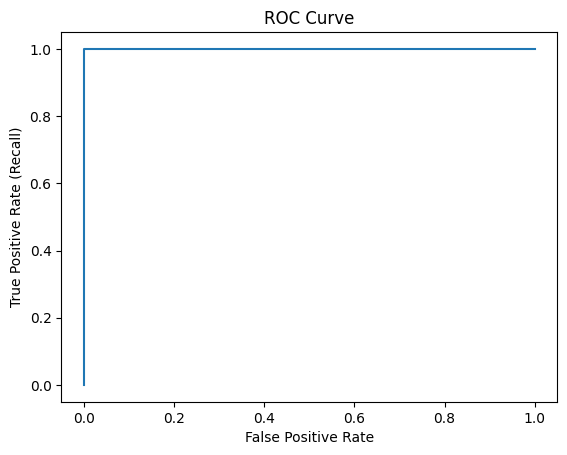

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# You can replace forest to check the other models' performance (does not work for svm)
y_probs=forest.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds=roc_curve(y_test, y_probs)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.show()

In [ ]:
print(roc_auc_score(y_test, y_probs))

1.0


##**5. Hyperparameter tuning**##

We use grid search to model different forest sizes and keep the best one

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'n_estimators': [100,200,500, 600, 700]
}

forest=RandomForestClassifier(n_jobs=-1, random_state=42)
grid_search=GridSearchCV(forest, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

In [ ]:
best_forest=grid_search.best_estimator_
best_forest

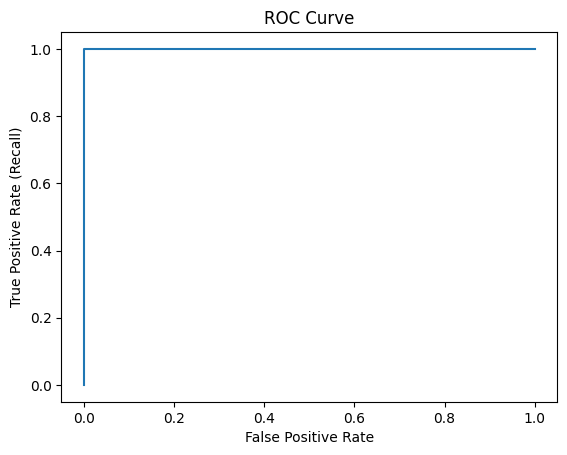

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_probs=best_forest.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds=roc_curve(y_test, y_probs)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.show()

In [ ]:
print(roc_auc_score(y_test,y_probs))

1.0


In [ ]:
print(f"Forest classifier accuracy score: {best_forest.score(X_test,y_test)}\n")
print(f"Best Forest classifier recall score: {recall_score(y_test,best_forest.predict(X_test))}\n")

Forest classifier accuracy score: 0.9853658536585366

Best Forest classifier recall score: 0.9711538461538461



##**6. Feature Importance**##

We can observe the differences in importance between between our first forest model and our best forest model

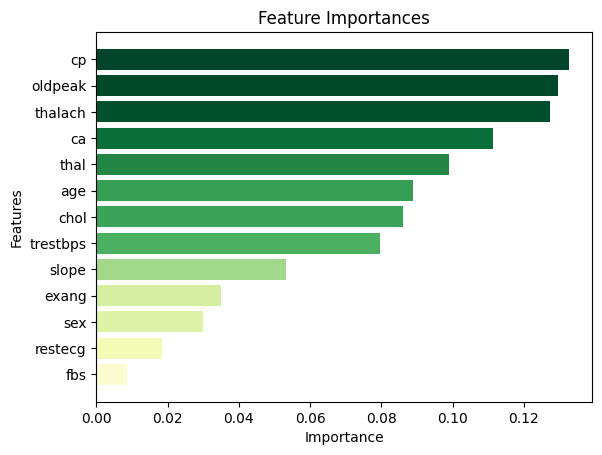

In [ ]:
import numpy as np
importances=forest.feature_importances_
features=forest.feature_names_in_

sorted_indices=np.argsort(importances)
sorted_features=features[sorted_indices]
sorted_importances=importances[sorted_indices]


colors=plt.cm.YlGn(sorted_importances/max(sorted_importances))


plt.barh(sorted_features, sorted_importances, color=colors)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

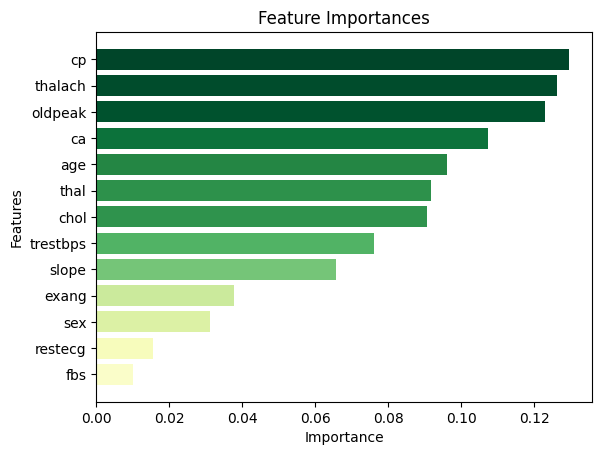

In [ ]:
import numpy as np
importances=best_forest.feature_importances_
features=best_forest.feature_names_in_

sorted_indices=np.argsort(importances)
sorted_features=features[sorted_indices]
sorted_importances=importances[sorted_indices]


colors=plt.cm.YlGn(sorted_importances/max(sorted_importances))


plt.barh(sorted_features, sorted_importances, color=colors)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

##**7. Correlation**##

We can observe that the strongest correlation is between target and exang (exercise induced angina) as well as target and oldpeak (ST depression induced by exercise relative to rest). However, they do not appear very high up in our models' feature importance ranking.

<Axes: >

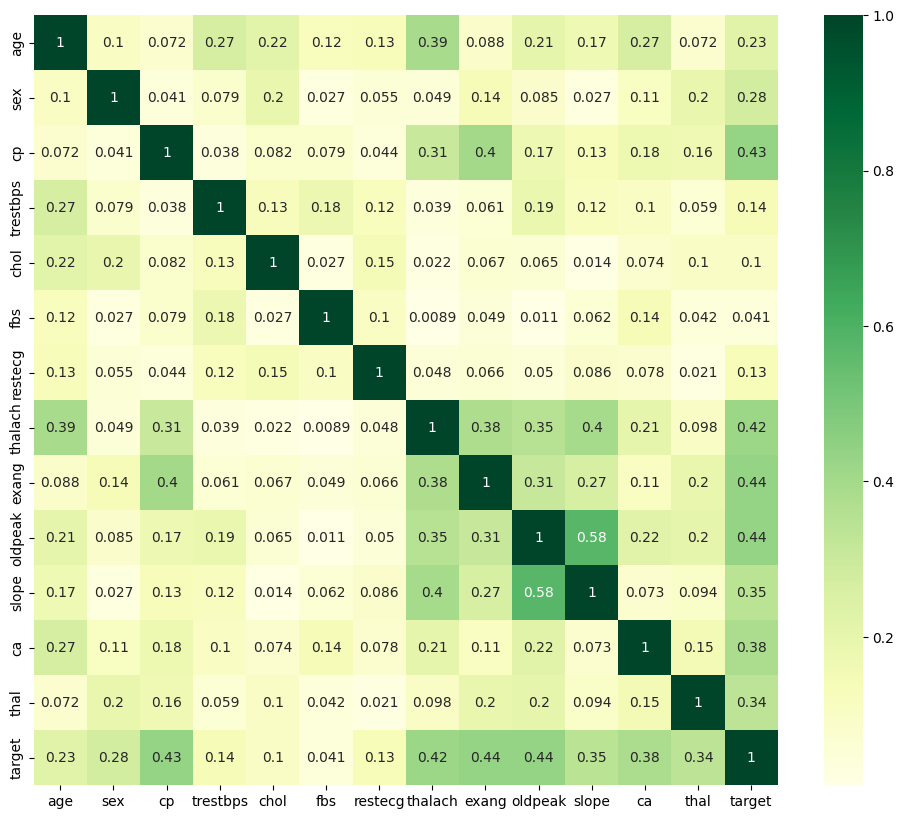

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(abs(df.corr()),annot=True, cmap='YlGn')